In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.4f}'.format
sns.set_style("white")
%matplotlib inline

In [2]:
df_2019 = pd.read_csv('data_2019.csv').set_index('Country')

In [3]:
X = df_2019.drop('2019_LE', axis=1).values
y = df_2019['2019_LE'].values
X_gini = X[:,0]
y = y.reshape(-1, 1)
X_gini = X_gini.reshape(-1, 1)
reg1 = LinearRegression()
reg1.fit(X_gini, y)
prediction_space1 = np.linspace(min(X_gini),max(X_gini)).reshape(-1, 1)

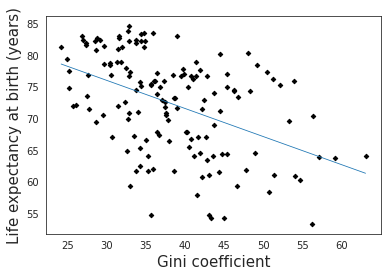

Pearsons correlation: -0.455 p-value:0.000


In [4]:
#Gini coefficients and life expectancy 
fig, ax = plt.subplots()
ax.scatter(X_gini, y, s=10, color='black',marker='D')
ax.plot(prediction_space1, reg1.predict(prediction_space1),linewidth=0.8)
ax.set_ylabel('Life expectancy at birth (years)',size=15)
ax.set_xlabel('Gini coefficient',size=15)
plt.savefig('le_gini.png',bbox_inches = 'tight')
plt.show()

(corr, p_value) = pearsonr(df_2019['2010-2018_gini'], df_2019['2019_LE'])
print('Pearsons correlation: %.3f' % corr 
      +' p-value:%.3f'% p_value)

In [5]:
developed = [' Japan', ' Spain',' Italy', ' Australia', ' Israel',
            ' Sweden', ' France',' Canada',' Norway',' Luxembourg',' Netherlands',
            ' Greece',' Portugal',' Finland',' Belgium',' Austria',' Germany',' United Kingdom',
            ' Denmark',' United States']

In [6]:
developed_abb = ['JPN', 'ESP', 'ITA', 'AUS', 'ISR',
            'SWE', 'FRA', 'CAN', 'NOR', 'LUX','NLD',
            'GRC', 'PRT', 'FIN', 'BEL', 'AUT', 'DEU','GBR',
            'DNK','USA']

In [7]:
df_dev = df_2019.loc[developed,:]
df_dev['abb'] = developed_abb
df_dev.head()

,2019_LE,2010-2018_gini,2019_scho_y,2017_health_exp,log_2019_GDP,abb
Country,,,,,,
Japan,84.6000,32.9000,12.8000,10.9000,4.6173,JPN
Spain,83.6000,34.7000,10.3000,8.9000,4.6115,ESP
Italy,83.5000,35.9000,10.4000,8.8000,4.6275,ITA
Australia,83.4000,34.4000,12.7000,9.2000,4.6968,AUS
Israel,83.0000,39.0000,13.0000,7.4000,4.6038,ISR


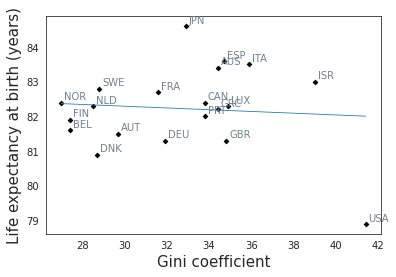

Pearsons correlation: -0.083 p-value:0.729


In [8]:
#Gini coefficients and life expectancy in top developed countries in 2019
X2 = df_dev.drop('2019_LE', axis=1).values
y2 = df_dev['2019_LE'].values
X_gini2 = X2[:,0]
y2 = y2.reshape(-1, 1)
X_gini2 = X_gini2.reshape(-1, 1)
reg2 = LinearRegression()
reg2.fit(X_gini2, y2)
prediction_space2 = np.linspace(min(X_gini2),max(X_gini2)).reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(X_gini2, y2, s=10, color='black',marker='D')


for i, txt in enumerate(df_dev.abb.values):
    ax.annotate(txt, 
                (X_gini2[i], y2[i]),
                textcoords="offset points",
                xytext=(3,3),
                size=10,
                annotation_clip=True,
                color = 'slategray') 

ax.plot(prediction_space2, reg2.predict(prediction_space2),linewidth=0.8)
ax.set_ylabel('Life expectancy at birth (years)',size=15)
ax.set_xlabel('Gini coefficient',size=15)
plt.savefig('le_gini_dev.png',bbox_inches = 'tight')
plt.show()

(corr2, p_value2) = pearsonr(df_dev['2010-2018_gini'], df_dev['2019_LE'])
print('Pearsons correlation: %.3f' % corr2 
      +' p-value:%.3f'% p_value2)

In [9]:
df_2000_dev = pd.read_csv('data_2000_dev.csv').set_index('Country')
df_2000_dev.head()

,2000_le,2000_edu,2000_gdp,2000_gini,abb
Country,,,,,
Luxembourg,78.1000,62.9000,96340,30.4000,LUX
Norway,78.7000,77.7000,56137,25.8000,NOR
United States,76.9000,96.3000,50236,40.8000,USA
Denmark,76.4000,56.9000,49024,24.7000,DNK
Netherlands,78.2000,84.9000,47645,32.6000,NLD


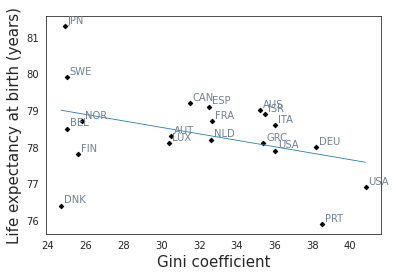

Pearsons correlation: -0.390 p-value:0.089


In [10]:
#Gini coefficients and life expectancy in top developed countries in 2000

x3 = df_2000_dev.drop('2000_le', axis=1).values
y3 = df_2000_dev['2000_le'].values
X_gini3 = x3[:,2]
y3 = y3.reshape(-1, 1)
X_gini3 = X_gini3.reshape(-1, 1)
reg3 = LinearRegression()
reg3.fit(X_gini3, y3)
prediction_space3 = np.linspace(min(X_gini3),max(X_gini3)).reshape(-1, 1)

fig, ax = plt.subplots()
#figsize=(12,8)
ax.scatter(X_gini3, y3, s=10, color='black',marker='D')

for i, txt in enumerate(df_2000_dev.abb.values):
    ax.annotate(txt, 
                (X_gini3[i], y3[i]),
                textcoords="offset points",
                xytext=(3,3),
                size=10,
                annotation_clip=True,
                color = 'slategray') 

ax.plot(prediction_space3, reg3.predict(prediction_space3),linewidth=0.8)
ax.set_ylabel('Life expectancy at birth (years)',size=15)
ax.set_xlabel('Gini coefficient',size=15)
plt.savefig('le_gini_dev_00.png',bbox_inches = 'tight')
plt.show()

(corr3, p_value3) = pearsonr(df_2000_dev['2000_gini'], df_2000_dev['2000_le'])
print('Pearsons correlation: %.3f' % corr3 
      +' p-value:%.3f'% p_value3)

In [11]:
#Correlation Matrix in csv
data_filename = 'corr.csv'
output_filename = 'correlation_matrix.csv'
data = np.genfromtxt(data_filename,delimiter = ',')
correlation_matrix = np.corrcoef(data.T)
print(correlation_matrix)
np.savetxt(output_filename,correlation_matrix,delimiter=',')

[[ 1.         -0.45487419  0.77526742  0.4247033   0.86369778]
 [-0.45487419  1.         -0.39784584 -0.1513799  -0.39329584]
 [ 0.77526742 -0.39784584  1.          0.44102562  0.86422979]
 [ 0.4247033  -0.1513799   0.44102562  1.          0.38010755]
 [ 0.86369778 -0.39329584  0.86422979  0.38010755  1.        ]]


In [12]:
#Standardize variables 
df_2019_stan = pd.DataFrame()
for i in df_2019.columns.values:
    df_2019_stan[f'{i}_stan'] = preprocessing.scale(df_2019[i])
df_2019_stan = df_2019_stan.rename(columns={'2019_LE_stan': '2019_LE'})
df_2019_stan.head()

,2019_LE,2010-2018_gini_stan,2019_scho_y_stan,2017_health_exp_stan,log_2019_GDP_stan
0,0.5879,-1.3501,-0.1849,-0.0748,0.0436
1,-1.4559,1.6546,-1.0559,-1.4877,-0.4117
2,0.5620,0.3995,0.7171,0.9850,0.6092
3,0.3551,-0.4880,0.8415,1.4952,0.2012
4,1.4287,-0.4880,1.2770,1.0242,1.3037


In [13]:
#regression 
df = df_2019.reset_index()
df.head()

,Country,2019_LE,2010-2018_gini,2019_scho_y,2017_health_exp,log_2019_GDP
0,Algeria,76.9000,27.6000,8.0000,6.4000,4.0550
1,Angola,61.1000,51.3000,5.2000,2.8000,3.8231
2,Argentina,76.7000,41.4000,10.9000,9.1000,4.3431
3,Armenia,75.1000,34.4000,11.3000,10.4000,4.1353
4,Australia,83.4000,34.4000,12.7000,9.2000,4.6968


In [14]:
#df.drop(df_dev.index, axis = 0, inplace = True)
df.drop('Country', axis=1, inplace = True)
df.drop('2019_scho_y', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2019_LE          147 non-null    float64
 1   2010-2018_gini   147 non-null    float64
 2   2017_health_exp  147 non-null    float64
 3   log_2019_GDP     147 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


Text(0.5, 1.0, 'Correlation Matrix')

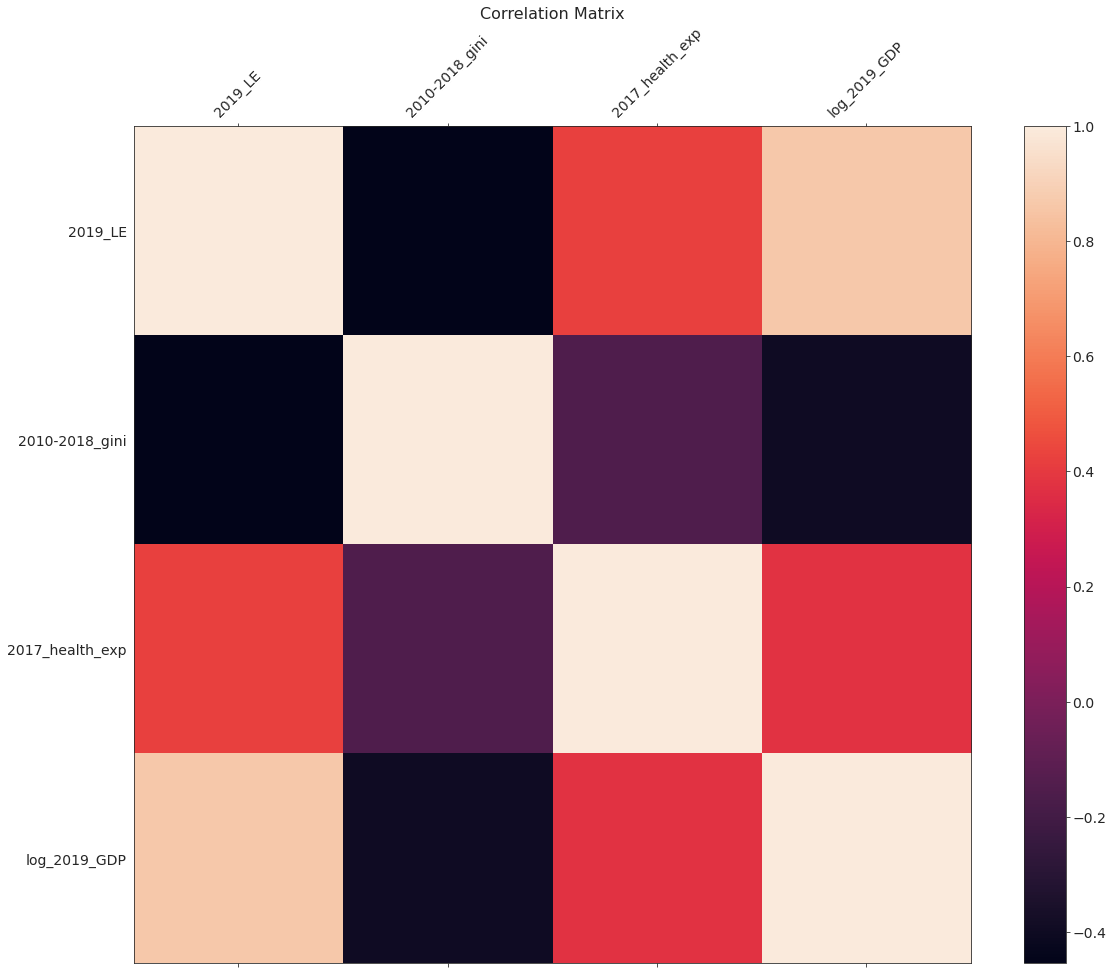

In [15]:
#Correlation Matrix
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [16]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
 https://moodle.ucl.ac.uk/my/   '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
df_vif = drop_column_using_vif_(df.drop('2019_LE', axis=1))
print("The columns remaining after VIF selection are:")
print(df_vif.columns)

The columns remaining after VIF selection are:
Index(['2010-2018_gini', '2017_health_exp', 'log_2019_GDP'], dtype='object')


In [18]:
model_df = sm.OLS(endog=df[['2019_LE']], exog=sm.add_constant(df_vif)).fit()
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                2019_LE   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           9.00e-46
Time:                        03:20:31   Log-Likelihood:                -400.41
No. Observations:                 147   AIC:                             808.8
Df Residuals:                     143   BIC:                             820.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.2318      3.634      7.769      0.000      21.048      35.415
2010-2018_gini     -0.1333      0.043     -3.135      0.002      -0.217      -0.049
2017_health_exp     0.3410      0.131      2.606      0.010       0.082       0.600
log_2019_GDP       11.6482      0.704     16.553      0.000      10.257      13.039
==============================================================================
Omnibus:                       13.153   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.752
Skew:                          -0.625   Prob(JB):                     0.000626
Kurtosis:                       3.919   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

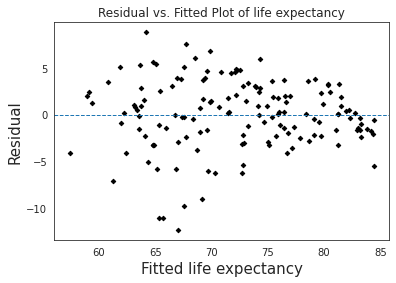

In [19]:
plt.scatter(model_df.fittedvalues, model_df.resid,s=10, color='black',marker='D')
# adding title and labels
plt.xlabel('Fitted life expectancy',size=15)
plt.ylabel('Residual',size=15)
plt.axhline(0,linewidth=1,ls='--')
plt.title('Residual vs. Fitted Plot of life expectancy')
plt.savefig('Residual.png',bbox_inches = 'tight')

plt.show()

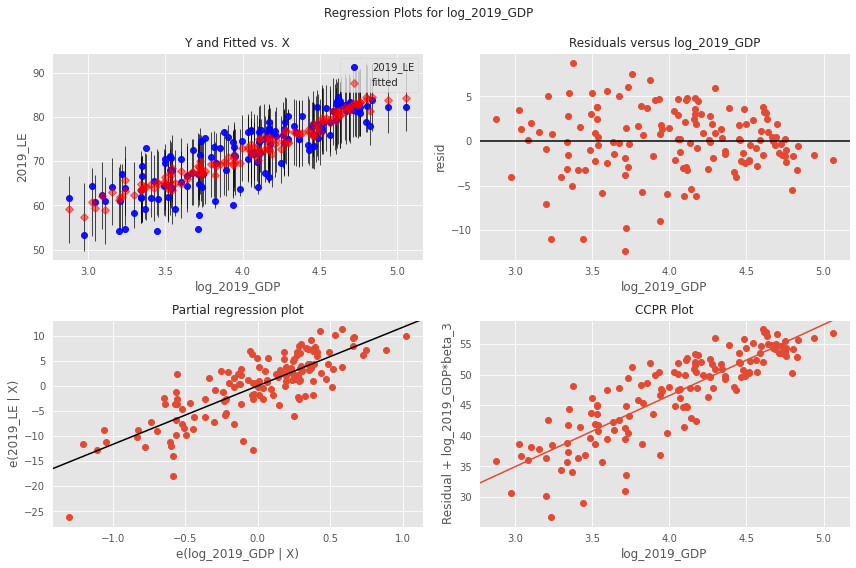

In [20]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_df, 'log_2019_GDP', fig=fig)
plt.savefig('residual_plot.png',bbox_inches = 'tight')

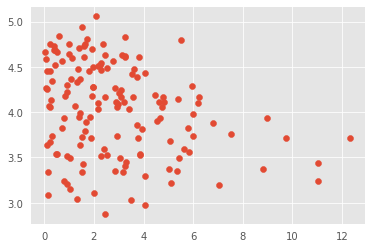

In [21]:
df['resi'] = model_df.resid
df['resi_2'] = df['resi'] **2
df['resi_abs'] = abs(df['resi'])
plt.scatter(df['resi_abs'], df['log_2019_GDP'])

In [22]:
model_df_resi = sm.OLS(endog=df[['resi_abs']], exog=sm.add_constant(df[['log_2019_GDP']])).fit()
model_df_resi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               resi_abs   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     12.30
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           0.000602
Time:                        03:20:34   Log-Likelihood:                -329.01
No. Observations:                 147   AIC:                             662.0
Df Residuals:                     145   BIC:                             668.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0633      1.504      5.363      0.000       5.091      11.035
log_2019_GDP    -1.2975      0.370     -3.508      0.001      -2.029      -0.566
==============================================================================
Omnibus:                       36.612   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.100
Skew:                           1.200   Prob(JB):                     3.27e-14
Kurtosis:                       5.092   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df['resi_abs_pred'] = df['log_2019_GDP'] * -1.2975 + 8.0633
df.head()

,2019_LE,2010-2018_gini,2017_health_exp,log_2019_GDP,resi,resi_2,resi_abs,resi_abs_pred
0,76.9000,27.6000,6.4000,4.0550,2.9317,8.5948,2.9317,2.8019
1,61.1000,51.3000,2.8000,3.8231,-5.7802,33.4104,5.7802,3.1029
2,76.7000,41.4000,9.1000,4.3431,0.2947,0.0869,0.2947,2.4281
3,75.1000,34.4000,10.4000,4.1353,-0.2608,0.0680,0.2608,2.6978
4,83.4000,34.4000,9.2000,4.6968,1.9070,3.6365,1.9070,1.9691


In [24]:
model_df_wls = sm.WLS(endog=df[['2019_LE']], exog=sm.add_constant(df_vif), weights=1 / (df[['resi_abs_pred']] ** 2))
res_wls = model_df_wls.fit()
res_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                2019_LE   R-squared:                       0.789
Model:                            WLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           3.59e-48
Time:                        03:20:34   Log-Likelihood:                -389.52
No. Observations:                 147   AIC:                             787.0
Df Residuals:                     143   BIC:                             799.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.4672      3.650      8.073      0.000      22.252      36.683
2010-2018_gini     -0.1201      0.039     -3.044      0.003      -0.198      -0.042
2017_health_exp     0.3776      0.112      3.380      0.001       0.157       0.598
log_2019_GDP       11.1654      0.700     15.941      0.000       9.781      12.550
==============================================================================
Omnibus:                        7.418   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.200
Skew:                          -0.531   Prob(JB):                       0.0273
Kurtosis:                       3.221   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""